# Interaction effects - Tutorial

Before we dive into logistic regression, we will learn about statistical ***interaction effects***. In the assignment, we will use the same concept but in a (slightly more) complex setting.

Let's see what we mean by interaction effect in a simple example.


## Visualize the data

We have a dataset in which we measure the performance of humans in some task, before and after some treatment (e.g. some drug). We would like to know whether the drug decreases the performance. To test this, we have designed an experiment with a treatment group that actually gets the drug administered and a placebo group that is not actually taking the drug.

**Let's have a look at the data.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

#import data
#data = pd.read_csv("interaction_data.csv")
data = pd.read_csv("https://raw.githubusercontent.com/wimmerlab/MBC_data_analysis/main/A4_LogisticRegression/interaction_data.csv")
data.head(20)

,y,placebo,after
0,2.640986,1.0,0.0
1,2.727337,1.0,0.0
2,2.068589,1.0,0.0
3,2.872562,1.0,0.0
4,3.327357,1.0,0.0
5,2.935718,1.0,0.0
6,2.257844,1.0,0.0
7,3.002695,1.0,0.0
8,2.677625,1.0,0.0
9,2.382329,1.0,0.0


**Compute the average performance and standard error for the different cases.**

In [2]:
grouped_data = data.groupby(['placebo', 'after'])['y'].agg(['mean', 'sem'])
grouped_data

mean       sem
placebo after                    
0.0     0.0    2.597026  0.066622
        1.0    1.946188  0.118754
1.0     0.0    2.689304  0.118754
        1.0    2.423089  0.135801

**Visualize this data using a bar plot and error bars.**

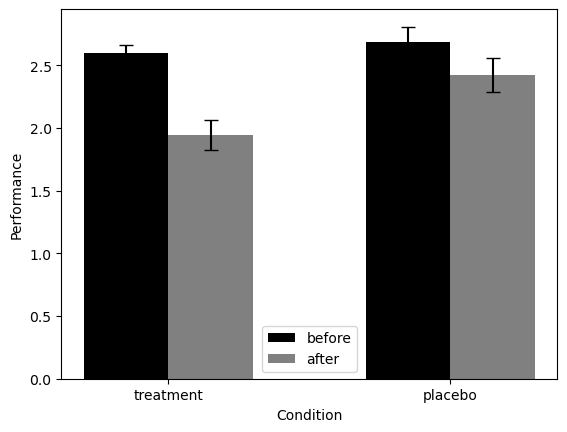

In [3]:
plt.figure;
bar_width = 0.3

ind = np.arange(2)
plt.bar(ind, grouped_data['mean'][:,0], yerr=grouped_data['sem'][:,0], capsize=5, width=bar_width, color='black',label='before')
plt.bar(ind+bar_width, grouped_data['mean'][:,1], yerr=grouped_data['sem'][:,1], capsize=5, width=bar_width, color='grey',label='after')

plt.legend();
plt.xticks(ind + bar_width / 2, ('treatment', 'placebo'))

plt.ylabel('Performance');
plt.xlabel('Condition');

**What do you think? Does the drug have an effect?**

## Wrong approach: test for significant differences and draw conclusions based on the outcome of these tests.

Let's do a t-test for the effectiveness of the drug (in the treatment group) and the effectiveness of the placebo (in the placebo group).

In [4]:
#T-test of performance before vs after for treatment
y_treatment_before = data[(data.placebo == 0) & (data.after == 0)].y
y_treatment_after = data[(data.placebo == 0) & (data.after == 1)].y
t, p_val_treatment = ttest_ind(y_treatment_before, y_treatment_after)

#T-test of performance before vs after for placebo
y_placebo_before = data[(data.placebo == 1) & (data.after == 0)].y
y_placebo_after = data[(data.placebo == 1) & (data.after == 1)].y
t, p_val_placebo = ttest_ind(y_placebo_before, y_placebo_after)

print("treatment p = ", p_val_treatment)
print("placebo p = ", p_val_placebo)

treatment p =  0.00014987724270248436
placebo p =  0.15730737231681893


**What do you conclude based on these results?**

## Now let's do it the correct way: using a regression anlaysis with an interaction term

The above procedure, involving two separate tests in which one effect is significant (P < 0.05) but the other is not (P > 0.05) does not allow us to conclude that the effect of the drug is different from the effect of the placebo. 

In short, the difference between significant and not significant need not itself be statistically significant!

So what's the correct way? A comparison of two experimental effects requires a statistical test on their difference. We can do this testing for an interaction between the time point of testing (before vs. after) and the condition (drug vs. placebo).

In [5]:
# Fit the linear regression model with interaction term
model = ols(formula = 'y ~ placebo * after', data=data)
result = model.fit()

# Display the regression summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     8.567
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           0.000201
Time:                        13:03:33   Log-Likelihood:                -13.491
No. Observations:                  40   AIC:                             34.98
Df Residuals:                      36   BIC:                             41.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5970      0.113     22.980

*There is actually no significant interaction effect, e.g. the drug had no statistically significant impact on the performance compared to the placebo.*